# Machine Learning Final Project 


# Data Introduction 

In [2]:
import pandas as pd 

import seaborn as sns
import sklearn as sk
import numpy as np
import matplotlib.pyplot as plt

column_names = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 
                'marital-status', 'occupation', 'relationship', 'race', 'sex',
                'capital-gain', 'capital-loss', 'hours-per-week', 
                'native-country', 'income']


# engine='python' to avoid warnings
df = pd.read_csv('adult.data', names=column_names, sep=', ', engine='python')
# test_df = pd.read_csv('adult.test', names=column_names, sep=', ', skiprows=1, engine='python')

len(df) # 32561 samples 
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


# Dataset name 'Census Income' 


# Data Exploration 

In [6]:
df.isnull().sum() #no missing values in the dataset

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

In [8]:
print(df.describe())

                age        fnlwgt  education-num  capital-gain  capital-loss  \
count  32561.000000  3.256100e+04   32561.000000  32561.000000  32561.000000   
mean      38.581647  1.897784e+05      10.080679   1077.648844     87.303830   
std       13.640433  1.055500e+05       2.572720   7385.292085    402.960219   
min       17.000000  1.228500e+04       1.000000      0.000000      0.000000   
25%       28.000000  1.178270e+05       9.000000      0.000000      0.000000   
50%       37.000000  1.783560e+05      10.000000      0.000000      0.000000   
75%       48.000000  2.370510e+05      12.000000      0.000000      0.000000   
max       90.000000  1.484705e+06      16.000000  99999.000000   4356.000000   

       hours-per-week  
count    32561.000000  
mean        40.437456  
std         12.347429  
min          1.000000  
25%         40.000000  
50%         40.000000  
75%         45.000000  
max         99.000000  


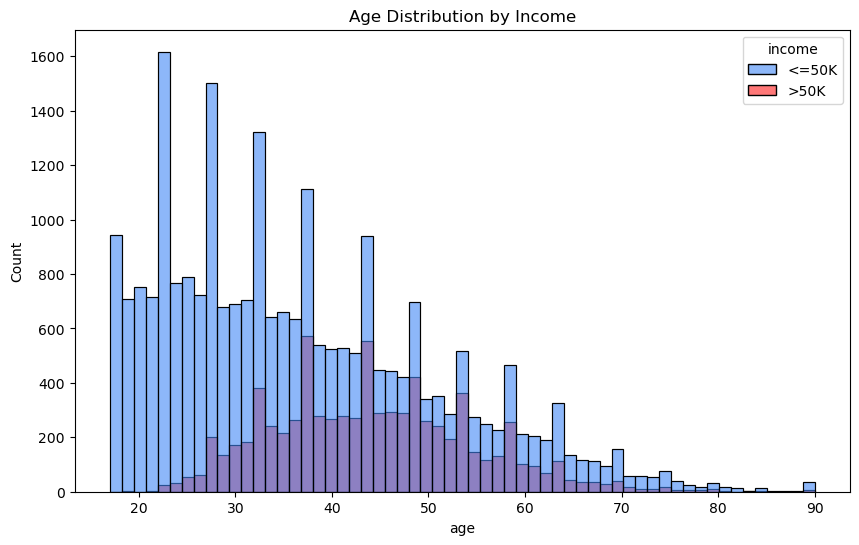

In [28]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='age', hue='income', palette=['#4287f5', '#FF1E1E'], alpha=0.6)
plt.title('Age Distribution by Income')
plt.show()

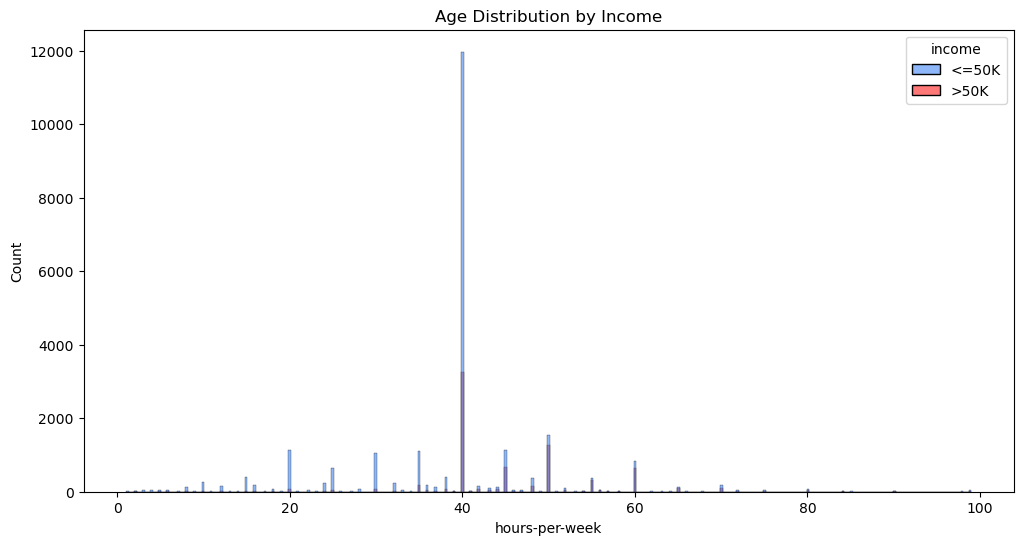

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='education', y='hours-per-week')
plt.xticks(rotation=45)
plt.title('Hours per Week by Education Level')
plt.show()